<h2>READ TENSORS<h2>

In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import nn
import itertools
import torch.nn.functional as F

from tensorflow import keras
import random
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

In [2]:
temperature_tensor = torch.load('temperature_tensor_v1.pt')
height_tensor = torch.load('height_tensor_v1.pt')

<h2>Data<h2>

In [3]:
temperatures = temperature_tensor.numpy()
heights = height_tensor.numpy()

t = []
for temperature in temperatures:
    t.append([temperature[0]])
t = np.array(t)
t_tensor = torch.from_numpy(t).float()
    
h = []
for height in heights:
    h.append([height[0]])
h = np.array(h)
h_tensor = torch.from_numpy(h).float()

<h2>Different Activation Functions<h2>

<h2>CNN with Sigmoid Activation<h2>

In [4]:
num_epochs = 20
learning_rate = 0.001

In [17]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.Sigmoid())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.Sigmoid())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [18]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [20]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  5%|████▏                                                                              | 1/20 [00:01<00:27,  1.44s/it]

13639.548


 10%|████████▎                                                                          | 2/20 [00:02<00:23,  1.31s/it]

13618.785


 15%|████████████▍                                                                      | 3/20 [00:03<00:20,  1.21s/it]

13602.261


 20%|████████████████▌                                                                  | 4/20 [00:05<00:19,  1.23s/it]

13588.667


 25%|████████████████████▊                                                              | 5/20 [00:06<00:17,  1.18s/it]

13576.624


 30%|████████████████████████▉                                                          | 6/20 [00:07<00:16,  1.15s/it]

13565.825


 35%|█████████████████████████████                                                      | 7/20 [00:08<00:14,  1.14s/it]

13556.732


 40%|█████████████████████████████████▏                                                 | 8/20 [00:09<00:14,  1.22s/it]

13549.766


 45%|█████████████████████████████████████▎                                             | 9/20 [00:10<00:13,  1.20s/it]

13544.086


 50%|█████████████████████████████████████████                                         | 10/20 [00:11<00:11,  1.14s/it]

13540.223


 55%|█████████████████████████████████████████████                                     | 11/20 [00:12<00:09,  1.09s/it]

13537.696


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:13<00:08,  1.06s/it]

13535.825


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:14<00:07,  1.05s/it]

13534.401


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:16<00:06,  1.13s/it]

13533.308


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:17<00:05,  1.11s/it]

13532.445


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:18<00:04,  1.06s/it]

13531.707


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:19<00:03,  1.02s/it]

13531.01


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:20<00:01,  1.01it/s]

13530.508


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:21<00:01,  1.02s/it]

13530.19


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]

13529.946


In [21]:
print(losses)

[array(13639.548, dtype=float32), array(13618.785, dtype=float32), array(13602.261, dtype=float32), array(13588.667, dtype=float32), array(13576.624, dtype=float32), array(13565.825, dtype=float32), array(13556.732, dtype=float32), array(13549.766, dtype=float32), array(13544.086, dtype=float32), array(13540.223, dtype=float32), array(13537.696, dtype=float32), array(13535.825, dtype=float32), array(13534.401, dtype=float32), array(13533.308, dtype=float32), array(13532.445, dtype=float32), array(13531.707, dtype=float32), array(13531.01, dtype=float32), array(13530.508, dtype=float32), array(13530.19, dtype=float32), array(13529.946, dtype=float32)]


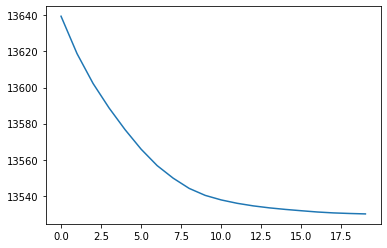

In [22]:
plt.plot(losses)
plt.show()

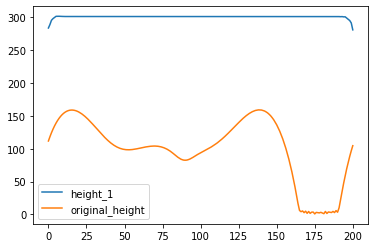

In [31]:
temp = 200

mean_t = mean(t_tensor[temp][0].tolist())

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
# print(output_1)
output_1 = output_1 * mean_t
plt.plot(output_1[0], label = 'height_1')

# output_2 = model(t_tensor[250])
# output_2 = output_2.detach().numpy()
# plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

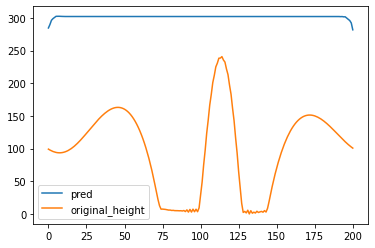

In [32]:
temp = 400

mean_t = mean(t_tensor[temp][0].tolist())

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
output_1 = output_1 * mean_t
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

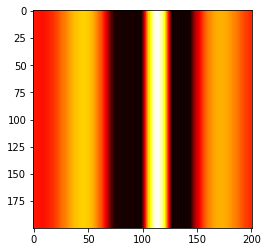

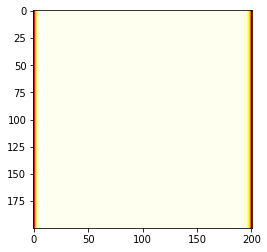

In [34]:
h_orig = np.tile(h[0], (200, 1))
h_pred = np.tile(output_1[0]*mean_t, (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>MLP<h2>

In [40]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.Sigmoid())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.Sigmoid())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [41]:
model = MLP() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [43]:
losses = []
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  4%|███▎                                                                              | 4/100 [00:00<00:05, 16.73it/s]

13627.207
13621.237
13616.618
13611.8955
13607.291


 10%|████████                                                                         | 10/100 [00:00<00:03, 22.60it/s]

13602.772
13598.362
13594.076
13589.934
13585.951
13582.138


 16%|████████████▉                                                                    | 16/100 [00:00<00:03, 23.86it/s]

13578.503
13575.056
13571.799
13568.735
13565.861


 19%|███████████████▍                                                                 | 19/100 [00:00<00:03, 24.10it/s]

13563.179
13560.682
13558.363
13556.218
13554.235


 25%|████████████████████▎                                                            | 25/100 [00:01<00:02, 25.54it/s]

13552.41
13550.731
13549.188
13547.773
13546.476
13545.29


 31%|█████████████████████████                                                        | 31/100 [00:01<00:02, 23.11it/s]

13544.203
13543.207
13542.295
13541.462


 34%|███████████████████████████▌                                                     | 34/100 [00:01<00:03, 20.19it/s]

13540.698
13540.0
13539.358
13538.769


 37%|█████████████████████████████▉                                                   | 37/100 [00:01<00:03, 18.14it/s]

13538.228
13537.7295
13537.272


 41%|█████████████████████████████████▏                                               | 41/100 [00:02<00:03, 16.69it/s]

13536.851
13536.461
13536.101


 45%|████████████████████████████████████▍                                            | 45/100 [00:02<00:03, 16.42it/s]

13535.768
13535.46
13535.174
13534.905


 49%|███████████████████████████████████████▋                                         | 49/100 [00:02<00:03, 16.88it/s]

13534.658
13534.427
13534.213
13534.01


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:02<00:03, 15.61it/s]

13533.822
13533.6455
13533.4795


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:02<00:03, 14.73it/s]

13533.322
13533.177
13533.037
13532.906


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:03<00:01, 19.91it/s]

13532.782
13532.664
13532.554
13532.448
13532.347
13532.253


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:03<00:01, 21.31it/s]

13532.162
13532.075
13531.993
13531.912
13531.837


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:03<00:01, 21.85it/s]

13531.765
13531.694
13531.628
13531.564
13531.502


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:03<00:01, 22.17it/s]

13531.441
13531.385
13531.329
13531.275
13531.225


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:04<00:00, 23.16it/s]

13531.175
13531.127
13531.08
13531.035
13530.99
13530.95


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:04<00:00, 24.31it/s]

13530.908
13530.867
13530.828
13530.792
13530.754
13530.719


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:04<00:00, 24.14it/s]

13530.685
13530.649
13530.617
13530.585


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:04<00:00, 21.79it/s]

13530.554
13530.523
13530.492


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:04<00:00, 19.14it/s]

13530.464
13530.436
13530.408


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.73it/s]

13530.381


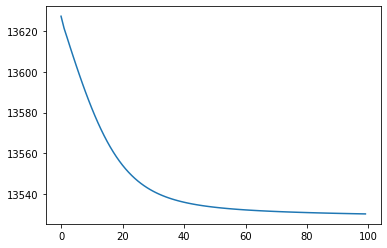

In [44]:
plt.plot(losses)
plt.show()

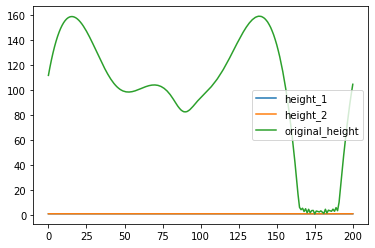

In [45]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

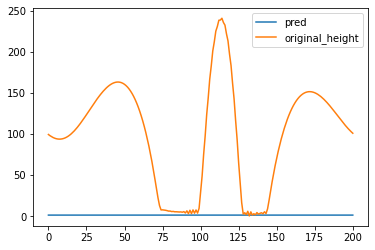

In [46]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

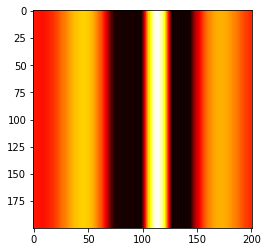

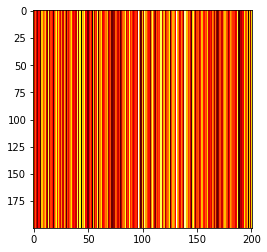

In [47]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>CNN with Softmax Activation<h2>

In [48]:
num_epochs = 20
learning_rate = 0.001

In [55]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.Softmax(dim=2))
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.Softmax(dim=2))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [56]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [58]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  5%|████▏                                                                              | 1/20 [00:01<00:30,  1.62s/it]

13726.49


 10%|████████▎                                                                          | 2/20 [00:03<00:28,  1.60s/it]

13726.487


 15%|████████████▍                                                                      | 3/20 [00:04<00:27,  1.59s/it]

13726.487


 20%|████████████████▌                                                                  | 4/20 [00:06<00:25,  1.58s/it]

13726.485


 25%|████████████████████▊                                                              | 5/20 [00:07<00:23,  1.57s/it]

13726.485


 30%|████████████████████████▉                                                          | 6/20 [00:09<00:22,  1.58s/it]

13726.485


 35%|█████████████████████████████                                                      | 7/20 [00:11<00:21,  1.68s/it]

13726.482


 40%|█████████████████████████████████▏                                                 | 8/20 [00:13<00:20,  1.74s/it]

13726.482


 45%|█████████████████████████████████████▎                                             | 9/20 [00:14<00:18,  1.70s/it]

13726.4795


 50%|█████████████████████████████████████████                                         | 10/20 [00:16<00:16,  1.67s/it]

13726.4795


 55%|█████████████████████████████████████████████                                     | 11/20 [00:18<00:14,  1.64s/it]

13726.479


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:19<00:12,  1.62s/it]

13726.478


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:21<00:11,  1.66s/it]

13726.478


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:22<00:09,  1.62s/it]

13726.476


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:24<00:08,  1.69s/it]

13726.475


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:26<00:06,  1.64s/it]

13726.472


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:27<00:04,  1.60s/it]

13726.472


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:29<00:03,  1.63s/it]

13726.471


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:31<00:01,  1.59s/it]

13726.47


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.62s/it]

13726.47


In [59]:
print(losses)

[array(13726.49, dtype=float32), array(13726.487, dtype=float32), array(13726.487, dtype=float32), array(13726.485, dtype=float32), array(13726.485, dtype=float32), array(13726.485, dtype=float32), array(13726.482, dtype=float32), array(13726.482, dtype=float32), array(13726.4795, dtype=float32), array(13726.4795, dtype=float32), array(13726.479, dtype=float32), array(13726.478, dtype=float32), array(13726.478, dtype=float32), array(13726.476, dtype=float32), array(13726.475, dtype=float32), array(13726.472, dtype=float32), array(13726.472, dtype=float32), array(13726.471, dtype=float32), array(13726.47, dtype=float32), array(13726.47, dtype=float32)]


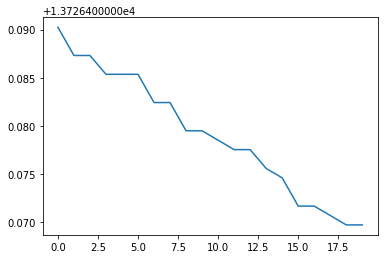

In [60]:
plt.plot(losses)
plt.show()

In [62]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

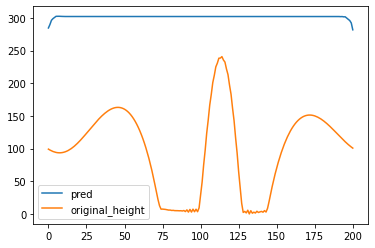

In [32]:
temp = 400

mean_t = mean(t_tensor[temp][0].tolist())

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
output_1 = output_1 * mean_t
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

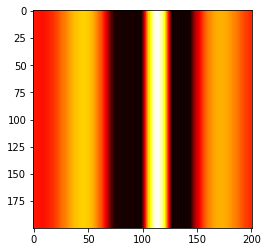

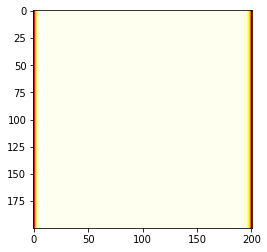

In [34]:
h_orig = np.tile(h[0], (200, 1))
h_pred = np.tile(output_1[0]*mean_t, (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>MLP<h2>

In [40]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.Sigmoid())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.Sigmoid())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [41]:
model = MLP() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [43]:
losses = []
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  4%|███▎                                                                              | 4/100 [00:00<00:05, 16.73it/s]

13627.207
13621.237
13616.618
13611.8955
13607.291


 10%|████████                                                                         | 10/100 [00:00<00:03, 22.60it/s]

13602.772
13598.362
13594.076
13589.934
13585.951
13582.138


 16%|████████████▉                                                                    | 16/100 [00:00<00:03, 23.86it/s]

13578.503
13575.056
13571.799
13568.735
13565.861


 19%|███████████████▍                                                                 | 19/100 [00:00<00:03, 24.10it/s]

13563.179
13560.682
13558.363
13556.218
13554.235


 25%|████████████████████▎                                                            | 25/100 [00:01<00:02, 25.54it/s]

13552.41
13550.731
13549.188
13547.773
13546.476
13545.29


 31%|█████████████████████████                                                        | 31/100 [00:01<00:02, 23.11it/s]

13544.203
13543.207
13542.295
13541.462


 34%|███████████████████████████▌                                                     | 34/100 [00:01<00:03, 20.19it/s]

13540.698
13540.0
13539.358
13538.769


 37%|█████████████████████████████▉                                                   | 37/100 [00:01<00:03, 18.14it/s]

13538.228
13537.7295
13537.272


 41%|█████████████████████████████████▏                                               | 41/100 [00:02<00:03, 16.69it/s]

13536.851
13536.461
13536.101


 45%|████████████████████████████████████▍                                            | 45/100 [00:02<00:03, 16.42it/s]

13535.768
13535.46
13535.174
13534.905


 49%|███████████████████████████████████████▋                                         | 49/100 [00:02<00:03, 16.88it/s]

13534.658
13534.427
13534.213
13534.01


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:02<00:03, 15.61it/s]

13533.822
13533.6455
13533.4795


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:02<00:03, 14.73it/s]

13533.322
13533.177
13533.037
13532.906


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:03<00:01, 19.91it/s]

13532.782
13532.664
13532.554
13532.448
13532.347
13532.253


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:03<00:01, 21.31it/s]

13532.162
13532.075
13531.993
13531.912
13531.837


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:03<00:01, 21.85it/s]

13531.765
13531.694
13531.628
13531.564
13531.502


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:03<00:01, 22.17it/s]

13531.441
13531.385
13531.329
13531.275
13531.225


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:04<00:00, 23.16it/s]

13531.175
13531.127
13531.08
13531.035
13530.99
13530.95


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:04<00:00, 24.31it/s]

13530.908
13530.867
13530.828
13530.792
13530.754
13530.719


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:04<00:00, 24.14it/s]

13530.685
13530.649
13530.617
13530.585


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:04<00:00, 21.79it/s]

13530.554
13530.523
13530.492


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:04<00:00, 19.14it/s]

13530.464
13530.436
13530.408


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.73it/s]

13530.381


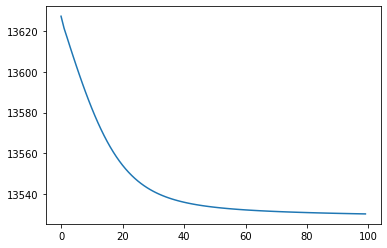

In [44]:
plt.plot(losses)
plt.show()

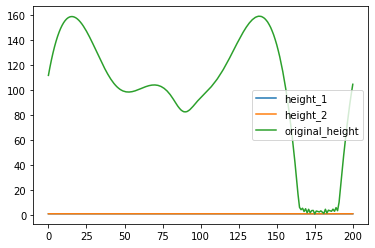

In [45]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

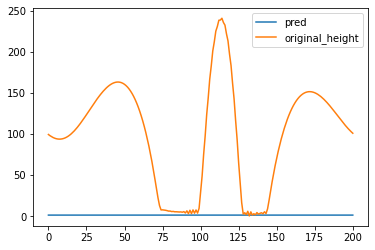

In [46]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

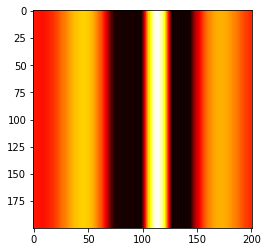

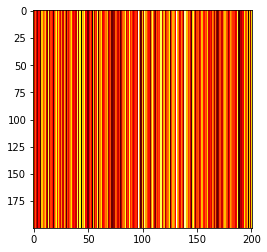

In [47]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()